# ************Sara Khosravi********

## Truck delivery optimization

As a Logistics company, it is necessary to provide an effective trip experience to the customer in an optimized cost.

To provide an effective service we need to identify the parameters that impact the on-time arrival of the truck.
With the pattern formed we need to formulate the data points that would help reduce the trip cost

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# For example, here's several helpful packages to load

import warnings
warnings.filterwarnings('ignore')

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import pandas_profiling

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
os.chdir(r'C:\Sara\Data SCIENCE\DataMining\Project')
os.getcwd()


'C:\\Sara\\Data SCIENCE\\DataMining\\Project'

###### What are the types of data analysis in Python?

Data can be in any of the popular formats - CSV, TXT, XLS/XLSX (Excel), sas7bdat (SAS), Stata, Rdata (R) etc. Loading data in python environment is the most initial step of analyzing data. Date Type variable in consistent date format. pandas is a powerful data analysis package. It makes data exploration and manipulation easy.

In [2]:
data=pd.read_excel(r'C:\Sara\Data SCIENCE\DataMining\Project\Delivery truck trip data.xlsx')
data.shape

(6880, 32)

##### DataFrame - head() function

Pandas DataFrame head () Method in Python By Ankit Lathiya Last updated May 26, 2020 Pandas DataFrame head () method returns top n rows of a DataFrame or Series where n is a user input value. The head () function is used to get the first n rows.
The head () function is used to get the first n rows. It is useful for quickly testing if your object has the right type of data in it. For negative values of n, the head () function returns all rows except the last n rows, equivalent to df [:-n]. The head () method in python contains only one parameter, which is n.

In [3]:
data.head(5)

,GpsProvider,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Data_Ping_time,...,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,Minimum_kms_to_be_covered_in_a_day,Driver_Name,Driver_MobileNo,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped
0,CONSENT TRACK,MVCV0000927/082021,Market,2020-08-17 14:59:01.000,KA590408,"TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA","13.1550,80.1960","12.7400,77.8200",2020-08-24 00:05:09,...,320.0,NaN,NaN,NaN,NaN,ALLEXCHE45,Ashok leyland limited,VIJEXHOSR7,VIJAY TRANSPORT,BRACKET / GRAB HANDLE
1,VAMOSYS,VCV00014271/082021,Regular,2020-08-27 16:22:22.827,TN30BC5917,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:28,...,103.0,NaN,NaN,RAMESH,NaN,DMREXCHEUX,Daimler india commercial vehicles pvt lt,VJLEXSHE09,VJ LOGISTICS,ZB MODEL PLATE / 3143
2,CONSENT TRACK,VCV00014382/082021,Regular,2020-08-27 17:59:24.987,TN22AR2748,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8710,79.7390","11.8710,79.7390",2020-08-28 09:05:09,...,300.0,NaN,NaN,GIRI,NaN,LUTGCCHE06,Lucas tvs ltd,GSTEXLAK1Q,G.S. TRANSPORT,LETTERING / FUSO
3,VAMOSYS,VCV00014743/082021,Regular,2020-08-28 00:48:24.503,TN28AQ0781,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:31,...,61.0,NaN,NaN,RAVI,NaN,DMREXCHEUX,Daimler india commercial vehicles pvt lt,ARVEXNAM09,ARVINTH TRANSPORT,LU STRUT RA / RADIUS ROD
4,VAMOSYS,VCV00014744/082021,Regular,2020-08-28 01:23:19.243,TN68F1722,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8720,79.6320","11.8720,79.6320",2020-08-28 12:40:29,...,240.0,NaN,NaN,TAMIL,NaN,LUTGCCHE06,Lucas tvs ltd,SRTEXKOR96,SR TRANSPORTS,WISHBONE / V ROD/HDT


##### DataFrame - tail() function

The tail() function is used to get the last n rows. This function returns last n rows from the object based on position. It is useful for quickly verifying data, for example, after sorting or appending rows. Syntax: DataFrame.tail(self, n=5) Parameters:

In [4]:
data.tail(5)

,GpsProvider,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Data_Ping_time,...,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,Minimum_kms_to_be_covered_in_a_day,Driver_Name,Driver_MobileNo,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped
6875,JTECH,WDSBKTP42751,Regular,2019-03-27 17:25:33,KA219502,"Ramamurthy Nagar, Bangalore, Karnataka","Sahakaranagar P.O, Bangalore, Karnataka","13.007503209603689,77.665098855934886","13.068901840235711,77.590655738806618",2019-06-14 15:20:12,...,12.0,25 FT Open Body 21MT,NaN,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,TOOL KIT SET
6876,JTECH,WDSBKTP43203,Regular,2019-03-31 15:02:34,KA01AE9163,"Ramamurthy Nagar, Bangalore, Karnataka","Bangalore International Airport, Bangalore, Ka...","13.007503209603689,77.665098855934886","13.196312912801169,77.708156925688726",2019-06-14 15:20:12,...,31.0,40 FT 3XL Trailer 35MT,NaN,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,CONTROL LEVER ASSY
6877,JTECH,WDSBKTP43021,Regular,2019-03-29 18:56:26,KA01AE9163,"Mugabala, Bangalore Rural, Karnataka","Anekal, Bangalore, Karnataka","16.560192249175344,80.792293091599547","12.722686,77.676518",2019-06-14 15:20:12,...,49.0,40 FT 3XL Trailer 35MT,NaN,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,SPARE PARTS AUTOMOBILE
6878,JTECH,WDSBKTP42685,Regular,2019-03-27 08:29:45,KA21A3643,"Mugabala, Bangalore Rural, Karnataka","Anekal, Bangalore, Karnataka","16.560192249175344,80.792293091599547","12.896896847817695,77.712223056874862",2019-06-14 15:20:12,...,49.0,40 FT 3XL Trailer 35MT,NaN,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,SPARE PARTS AUTOMOBILE
6879,JTECH,WDSBKTP42858,Regular,2019-03-28 17:55:17,KA51D1317,"Mugabala, Bangalore Rural, Karnataka","Anekal, Bangalore, Karnataka","16.560192249175344,80.792293091599547","13.199089183304451,77.708554234959038",2019-06-14 15:20:12,...,49.0,40 FT 3XL Trailer 35MT,NaN,NaN,NaN,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,SPARE PARTS AUTOMOBILE


##### iloc () 
Python iloc () function enables us to select a particular cell of the dataset, that is, it helps us select a value that belongs to a particular row or column from a set of values of a data frame or dataset. With iloc () function, we can retrieve a particular value belonging to a row and column using the index values assigned to it.
Python | Extracting rows using Pandas .iloc[] Python is a great language for doing data analysis, primarily because of the fantastic ecosystem of data-centric Python packages. Pandas is one of those packages and makes importing and analyzing data much easier. Pandas provide a unique method to retrieve rows from a Data frame.

In [5]:
data=data.iloc[:6880, :]
data.shape

(6880, 32)

##### set_option(param,value)

set_option takes two arguments and sets the value to the parameter as shown below −

display.max_rows
Using set_option(), we can change the default number of rows to be displayed.

Pandas provide API to customize some aspects of its behavior, display is being mostly used.

The API is composed of five relevant functions. They are −

get_option()
set_option()
reset_option()
describe_option()
option_context()
Let us now understand how the functions operate.


##### How to widen output display to see more columns in Pandas dataframe?

In Python, if there are many more number of columns in the dataframe, then not all the columns will be shown in the output display. So, let’s see how to widen output display to see more columns.

Method: Using pandas.set_option() function.

This function is used to set the value of a specified option.

In [6]:
pd.set_option('max_columns', 50)
data.head(5)

,GpsProvider,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Data_Ping_time,Planned_ETA,Current_Location,DestinationLocation,actual_eta,Curr_lat,Curr_lon,ontime,delay,OriginLocation_Code,DestinationLocation_Code,trip_start_date,trip_end_date,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,Minimum_kms_to_be_covered_in_a_day,Driver_Name,Driver_MobileNo,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped
0,CONSENT TRACK,MVCV0000927/082021,Market,2020-08-17 14:59:01.000,KA590408,"TVSLSL-PUZHAL-HUB,CHENNAI,TAMIL NADU","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA","13.1550,80.1960","12.7400,77.8200",2020-08-24 00:05:09,2020-08-21 18:59:01.000,"Vaniyambadi Rd, Valayambattu, Tamil Nadu 63575...","ASHOK LEYLAND PLANT 1- HOSUR,HOSUR,KARNATAKA",2020-08-28 14:38:04.447,12.663500,78.649870,NaN,R,CHEPUZTVSHUA1,HOSHOSALLCCA2,2020-08-17 14:59:01,NaT,320.0,NaN,NaN,NaN,NaN,ALLEXCHE45,Ashok leyland limited,VIJEXHOSR7,VIJAY TRANSPORT,BRACKET / GRAB HANDLE
1,VAMOSYS,VCV00014271/082021,Regular,2020-08-27 16:22:22.827,TN30BC5917,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:28,2020-08-31 20:22:22.827,"Unnamed Road, Oragadam Industrial Corridor, Va...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...",2020-08-28 12:46:17.007,12.836757,79.954428,G,NaN,CHEORADMRCCB1,CHEMATDMROPA7,2020-08-27 16:21:52,NaT,103.0,NaN,NaN,RAMESH,NaN,DMREXCHEUX,Daimler india commercial vehicles pvt lt,VJLEXSHE09,VJ LOGISTICS,ZB MODEL PLATE / 3143
2,CONSENT TRACK,VCV00014382/082021,Regular,2020-08-27 17:59:24.987,TN22AR2748,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8710,79.7390","11.8710,79.7390",2020-08-28 09:05:09,2020-08-31 21:59:24.987,"570, National Hwy 48, Shenoy Nagar, Chennai, T...","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY",2020-08-28 16:03:30.793,13.073956,80.225780,G,NaN,CHEPONLUTCCA4,CHEPONLUTCCA4,2020-08-27 17:57:04,NaT,300.0,NaN,NaN,GIRI,NaN,LUTGCCHE06,Lucas tvs ltd,GSTEXLAK1Q,G.S. TRANSPORT,LETTERING / FUSO
3,VAMOSYS,VCV00014743/082021,Regular,2020-08-28 00:48:24.503,TN28AQ0781,"DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...","12.8390,79.9540","12.8390,79.9540",2020-08-28 12:40:31,2020-09-01 04:48:24.503,"Singaperumal Koil - Sriperumbudur Rd, Oragadam...","DAIMLER INDIA COMMERCIAL VEHICLES,KANCHIPURAM,...",2020-08-28 12:50:27.997,12.836686,79.950560,G,NaN,CHEORADMRCCB1,CHEMATDMROPA7,2020-08-28 00:47:45,NaT,61.0,NaN,NaN,RAVI,NaN,DMREXCHEUX,Daimler india commercial vehicles pvt lt,ARVEXNAM09,ARVINTH TRANSPORT,LU STRUT RA / RADIUS ROD
4,VAMOSYS,VCV00014744/082021,Regular,2020-08-28 01:23:19.243,TN68F1722,"LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY","11.8720,79.6320","11.8720,79.6320",2020-08-28 12:40:29,2020-09-01 05:23:19.243,"Melmaruvathur, Tamil Nadu 603319, India","LUCAS TVS LTD-PONDY,PONDY,PONDICHERRY",2020-08-28 14:22:50.127,12.429501,79.831556,G,NaN,CHENETLUTCCA1,CHENETLUTCCA1,2020-08-28 01:13:48,NaT,240.0,NaN,NaN,TAMIL,NaN,LUTGCCHE06,Lucas tvs ltd,SRTEXKOR96,SR TRANSPORTS,WISHBONE / V ROD/HDT


In [7]:
#making a copy of data before preprocessing
data_raw = data.copy()

##### What is pandas profile report?

Generates profile reports from a pandas DataFrame . The pandas df.describe () function is great but a little basic for serious exploratory data analysis. pandas_profiling extends the pandas DataFrame with df.profile_report () for quick data analysis.

The pandas_profiling library in Python include a method named as ProfileReport () which generate a basic report on the input DataFrame. A sample of DataFrame. Number of bins in histogram. The default is 10. Whether or not to check correlation. It’s `True` by default. Threshold to determine if the variable pair is correlated. The default is 0.9.

pandas_profiling.ProfileReport(data)

#    HANDLING MISSING VALUE     

##### WHAT DO WE DO TO MISSING VALUES

There are several options for handling missing values each with its own PROS and CONS. However, the choice of what should be done is largely dependent on the nature of our data and the missing values. Below is a summary highlight of several options we have for handling missing values.
DROP MISSING VALUES
FILL MISSING VALUES WITH TEST STATISTIC
PREDICT MISSING VALUE WITH A MACHINE LEARNING ALGORITHM
Below is a few list of commands to detect missing values with EDA.

##### dataframe.info()

This will tell us the total number of non null observations present including the total number of entries. Once number of entries isn’t equal to number of non null observations, we can begin to suspect missing values.

Python is a great language for doing data analysis, primarily because of the fantastic ecosystem of data-centric python packages. Pandas is one of those packages and makes importing and analyzing data much easier.

Pandas dataframe.info() function is used to get a concise summary of the dataframe. It comes really handy when doing exploratory analysis of the data. To get a quick overview of the dataset we use the dataframe.info() function.


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6880 entries, 0 to 6879
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   GpsProvider                         5927 non-null   object        
 1   BookingID                           6880 non-null   object        
 2   Market/Regular                      6880 non-null   object        
 3   BookingID_Date                      6880 non-null   datetime64[ns]
 4   vehicle_no                          6880 non-null   object        
 5   Origin_Location                     6880 non-null   object        
 6   Destination_Location                6880 non-null   object        
 7   Org_lat_lon                         6880 non-null   object        
 8   Des_lat_lon                         6880 non-null   object        
 9   Data_Ping_time                      5927 non-null   datetime64[ns]
 10  Planned_ETA             

##### data.describe()

This will display a summary statistics of all observed features and labels. The most important to note here is the min value. Once we see -1/0 in an observation like age/height/weight, then we have been able to detect missing value.

In [8]:
data.describe()

,Curr_lat,Curr_lon,TRANSPORTATION_DISTANCE_IN_KM,Minimum_kms_to_be_covered_in_a_day,Driver_MobileNo
count,5927.000000,5927.000000,6168.000000,2820.000000,2.691000e+03
mean,18.679995,78.759745,553.856282,250.239362,8.598981e+09
std,6.075561,4.216357,758.981836,24.315485,1.131669e+09
min,8.166790,69.657698,0.000000,0.000000,6.000546e+09
25%,12.871868,76.891857,40.000000,250.000000,7.651505e+09
50%,17.470922,77.843340,160.000000,250.000000,8.930762e+09
75%,23.202009,80.018999,900.000000,250.000000,9.634981e+09
max,32.367928,95.529550,2954.700000,275.000000,1.000000e+10


##### What is dataframe.isna in pandas?

Pandas dataframe.isna () function is used to detect missing values. It return a boolean same-sized object indicating if the values are NA. NA values, such as None or numpy.NaN, gets mapped to True values. Everything else gets mapped to False values.

data.isna()

##### What is the sum of missing values?

df.isnull ().sum () will give the column-wise sum of missing values. If you want to know the sum of missing values in a particular column then following code will work df.column.isnull ().sum () In case you need to get the non-NA (non-None) and NA (None) counts across different groups pulled out by groupby


This will tell us the total number of NaN in or data.
If the missing value isn’t identified as NaN , then we have to first convert or replace such non NaN entry with a NaN.


data_name[‘column_name’].replace(0, np.nan, inplace= True)

This will replace values of zero with NaN in the column named column_name of our data_name .

In [9]:
#Python, pandas
#Count missing values for each column of the dataframe df
#By default (axis = 0)

data.isna().sum()

GpsProvider                            953
BookingID                                0
Market/Regular                           0
BookingID_Date                           0
vehicle_no                               0
Origin_Location                          0
Destination_Location                     0
Org_lat_lon                              0
Des_lat_lon                              0
Data_Ping_time                         953
Planned_ETA                              0
Current_Location                       964
DestinationLocation                      0
actual_eta                              37
Curr_lat                               953
Curr_lon                               953
ontime                                4332
delay                                 2538
OriginLocation_Code                      3
DestinationLocation_Code                27
trip_start_date                          0
trip_end_date                          194
TRANSPORTATION_DISTANCE_IN_KM          712
vehicleType

###### Count total missing values in a dataframe

data.isnull().sum().sum()

#Gives a integer value

#Python, pandas
#Count missing values for each column of the dataframe df
data.isnull().sum(axis = 0)

#Python, pandas
#Count missing values for each row of the dataframe df
data.isnull().sum(axis = 1)

In [10]:
missingrows = data.isna().sum()

In [11]:
print(data.columns)
print(missingrows.shape)
print(data.shape)

Index(['GpsProvider', 'BookingID', 'Market/Regular ', 'BookingID_Date',
       'vehicle_no', 'Origin_Location', 'Destination_Location', 'Org_lat_lon',
       'Des_lat_lon', 'Data_Ping_time', 'Planned_ETA', 'Current_Location',
       'DestinationLocation', 'actual_eta', 'Curr_lat', 'Curr_lon', 'ontime',
       'delay', 'OriginLocation_Code', 'DestinationLocation_Code',
       'trip_start_date', 'trip_end_date', 'TRANSPORTATION_DISTANCE_IN_KM',
       'vehicleType', 'Minimum_kms_to_be_covered_in_a_day', 'Driver_Name',
       'Driver_MobileNo', 'customerID', 'customerNameCode', 'supplierID',
       'supplierNameCode', 'Material Shipped'],
      dtype='object')
(32,)
(6880, 32)


In [9]:
#Percentange of missing values 
for column in data.columns:
    print('Percentage of missing values in {} is {}'.format(column,missingrows[column]/len(data)))

Percentage of missing values in GpsProvider is 0.1385174418604651
Percentage of missing values in BookingID is 0.0
Percentage of missing values in Market/Regular  is 0.0
Percentage of missing values in BookingID_Date is 0.0
Percentage of missing values in vehicle_no is 0.0
Percentage of missing values in Origin_Location is 0.0
Percentage of missing values in Destination_Location is 0.0
Percentage of missing values in Org_lat_lon is 0.0
Percentage of missing values in Des_lat_lon is 0.0
Percentage of missing values in Data_Ping_time is 0.1385174418604651
Percentage of missing values in Planned_ETA is 0.0
Percentage of missing values in Current_Location is 0.14011627906976745
Percentage of missing values in DestinationLocation is 0.0
Percentage of missing values in actual_eta is 0.005377906976744186
Percentage of missing values in Curr_lat is 0.1385174418604651
Percentage of missing values in Curr_lon is 0.1385174418604651
Percentage of missing values in ontime is 0.6296511627906977
Perc

 14  Curr_lat                            5927 non-null   float64       
 15  Curr_lon                            5927 non-null   float64       
 22  TRANSPORTATION_DISTANCE_IN_KM       6168 non-null   float64       
 24  Minimum_kms_to_be_covered_in_a_day  2820 non-null   float64       
 26  Driver_MobileNo                     2691 non-null   float64    

In [12]:
data.describe()

,Curr_lat,Curr_lon,TRANSPORTATION_DISTANCE_IN_KM,Minimum_kms_to_be_covered_in_a_day,Driver_MobileNo
count,5927.000000,5927.000000,6168.000000,2820.000000,2.691000e+03
mean,18.679995,78.759745,553.856282,250.239362,8.598981e+09
std,6.075561,4.216357,758.981836,24.315485,1.131669e+09
min,8.166790,69.657698,0.000000,0.000000,6.000546e+09
25%,12.871868,76.891857,40.000000,250.000000,7.651505e+09
50%,17.470922,77.843340,160.000000,250.000000,8.930762e+09
75%,23.202009,80.018999,900.000000,250.000000,9.634981e+09
max,32.367928,95.529550,2954.700000,275.000000,1.000000e+10


In [13]:
data.shape

(6880, 32)

##### Cleaning Data : dropna() thresh option

Keep only the rows having 2 or more valid data

Keep only the rows having 3 or more valid data

Keep only columns where 11 or more than 11 valid data is available

Keep only rows where 70% or more valid data is available

Keep only columns where 80% or more valid data is available

thresh= 6880*0.20= 1376

In [14]:
#drop columns that have 80% or more missing values
dfT = data.dropna(axis=1, thresh=1376)

In [15]:
dfT.shape

(6880, 32)

In [16]:
type(data)

pandas.core.frame.DataFrame

In [17]:
type(dfT)

pandas.core.frame.DataFrame

In [18]:
data.describe()

,Curr_lat,Curr_lon,TRANSPORTATION_DISTANCE_IN_KM,Minimum_kms_to_be_covered_in_a_day,Driver_MobileNo
count,5927.000000,5927.000000,6168.000000,2820.000000,2.691000e+03
mean,18.679995,78.759745,553.856282,250.239362,8.598981e+09
std,6.075561,4.216357,758.981836,24.315485,1.131669e+09
min,8.166790,69.657698,0.000000,0.000000,6.000546e+09
25%,12.871868,76.891857,40.000000,250.000000,7.651505e+09
50%,17.470922,77.843340,160.000000,250.000000,8.930762e+09
75%,23.202009,80.018999,900.000000,250.000000,9.634981e+09
max,32.367928,95.529550,2954.700000,275.000000,1.000000e+10


In [19]:
dfT.describe()

,Curr_lat,Curr_lon,TRANSPORTATION_DISTANCE_IN_KM,Minimum_kms_to_be_covered_in_a_day,Driver_MobileNo
count,5927.000000,5927.000000,6168.000000,2820.000000,2.691000e+03
mean,18.679995,78.759745,553.856282,250.239362,8.598981e+09
std,6.075561,4.216357,758.981836,24.315485,1.131669e+09
min,8.166790,69.657698,0.000000,0.000000,6.000546e+09
25%,12.871868,76.891857,40.000000,250.000000,7.651505e+09
50%,17.470922,77.843340,160.000000,250.000000,8.930762e+09
75%,23.202009,80.018999,900.000000,250.000000,9.634981e+09
max,32.367928,95.529550,2954.700000,275.000000,1.000000e+10


In [20]:
pd.options.display.float_format = "{:.2f}".format
dfT.describe()# for numeric columns

,Curr_lat,Curr_lon,TRANSPORTATION_DISTANCE_IN_KM,Minimum_kms_to_be_covered_in_a_day,Driver_MobileNo
count,5927.00,5927.00,6168.00,2820.00,2691.00
mean,18.68,78.76,553.86,250.24,8598981266.45
std,6.08,4.22,758.98,24.32,1131668748.29
min,8.17,69.66,0.00,0.00,6000546262.00
25%,12.87,76.89,40.00,250.00,7651504602.50
50%,17.47,77.84,160.00,250.00,8930761921.00
75%,23.20,80.02,900.00,250.00,9634981447.00
max,32.37,95.53,2954.70,275.00,9999999999.00


data_name[‘column_name’].replace(0, np.nan, inplace= True)

This will replace values of zero with NaN in the column named column_name of our data_name .

##### value_counts()

Series.value_counts(normalize=False, sort=True, ascending=False, bins=None, dropna=True)

Return a Series containing counts of unique values.

The resulting object will be in descending order so that the first element is the most frequently-occurring element. Excludes NA values by default.

Series.count:
Number of non-NA elements in a Series.

DataFrame.count:
Number of non-NA elements in a DataFrame.

DataFrame.value_counts: 
Equivalent method on DataFrames.

In [116]:
dfT['ontime'].value_counts()

G    1591
Name: ontime, dtype: int64

In [117]:
dfT['delay'].value_counts()

R    4336
Name: delay, dtype: int64

In [22]:
#making a copy of data before preprocessing
data_raw=dfT.copy()

##### FILLING MISSING VALUES


This is the most common method of handling missing values. This is a process whereby missing values are replaced with a test statistic like mean, median or mode of the particular feature the missing value belongs to. One can also specify a forward-fill or back-fill to propagate the next values backward or previous value forward.

data["TRANSPORTATION_DISTANCE_IN_KM"].fillna( method ='ffill', limit = 1, inplace = True)

Reference for fillna():
    https://www.sharpsightlabs.com/blog/pandas-fillna/

In [118]:
dfT.describe()

,Curr_lat,Curr_lon,TRANSPORTATION_DISTANCE_IN_KM,Minimum_kms_to_be_covered_in_a_day,Driver_MobileNo,ontime/delay,Org_Dest_distance
count,5915.00,5915.00,5915.00,2624.00,5915.00,5915.00,5915.00
mean,18.69,78.76,598.07,248.77,0.45,0.27,593.11
std,6.08,4.22,774.43,24.43,0.50,0.44,606.70
min,8.17,69.66,0.00,0.00,0.00,0.00,0.00
25%,12.87,76.91,43.00,250.00,0.00,0.00,31.04
50%,17.47,77.84,177.00,250.00,0.00,0.00,390.68
75%,23.21,80.02,1020.00,250.00,1.00,1.00,950.68
max,32.37,95.53,2954.70,275.00,1.00,1.00,2339.13


##### Description of Categorical data :
    
We cannot directly describe categorical data statistically,we will have to do several steps to do the same.

In [119]:
a=(dfT.dtypes=="object")  
print(a)

GpsProvider                            True
BookingID                              True
Market/Regular                         True
BookingID_Date                        False
vehicle_no                             True
Origin_Location                        True
Destination_Location                   True
Org_lat_lon                            True
Des_lat_lon                            True
Data_Ping_time                        False
Planned_ETA                           False
Current_Location                       True
DestinationLocation                    True
actual_eta                            False
Curr_lat                              False
Curr_lon                              False
ontime                                 True
delay                                  True
OriginLocation_Code                    True
DestinationLocation_Code               True
trip_start_date                       False
trip_end_date                         False
TRANSPORTATION_DISTANCE_IN_KM   

In [121]:
b = dfT.dtypes[a]  # give the output if "a" returns True value 
b.describe()

count         24
unique         1
top       object
freq          24
dtype: object

##### pandas.Series.rolling

Series.rolling(window, min_periods=None, center=False, win_type=None, on=None, axis=0, closed=None)[source]
Provide rolling window calculations.

Parameters:

windowint, offset, or BaseIndexer subclass:
Size of the moving window. This is the number of observations used for calculating the statistic. Each window will be a fixed size.
If its an offset then this will be the time period of each window. Each window will be a variable sized based on the observations included in the time-period. This is only valid for datetimelike indexes.
If a BaseIndexer subclass is passed, calculates the window boundaries based on the defined get_window_bounds method. Additional rolling keyword arguments, namely min_periods, center, and closed will be passed to get_window_bounds.

min_periodsint, default None:

Minimum number of observations in window required to have a value (otherwise result is NA). For a window that is specified by an offset, min_periods will default to 1. Otherwise, min_periods will default to the size of the window.

centerbool, default False:

Set the labels at the center of the window.


***A rolling mean is simply the mean of a certain number of previous periods in a time series.

To calculate the rolling mean for one or more columns in a pandas DataFrame, we can use the following syntax:

df['column_name'].rolling(rolling_window).mean()

GpsProvider 13.850000000000001
Data_Ping_time 13.850000000000001
Current_Location 14.01
ontime 62.970000000000006
delay 36.89
vehicleType 12.030000000000001
Driver_Name 49.84
Driver_MobileNo 60.89

After using tresh, the percent of ontime is increase and the percent of delay decrease? Why? the shape of data does not change before and after using tresh (6880, 32), but the percent of columns 

#drop columns that have 80% or more missing values
dfT = data.dropna(axis=1, thresh=1376)

Keep only rows where 80% or more valid data is available

In [114]:
#let's check the percentage of null values in each feature
for col in dfT.columns:
    if dfT[col].isna().sum()>0:
        print(col, dfT[col].isna().mean().round(4)*100)

ontime 73.1
delay 26.69
OriginLocation_Code 0.05
DestinationLocation_Code 0.45999999999999996
Minimum_kms_to_be_covered_in_a_day 55.64


In [23]:
#Method1
dfT.fillna({
            #let's name unkown for null values in driver name
            'Driver_Name' : dfT.Driver_Name.fillna('Unknown'),

            #let's impute transportation distence with mean value
            'TRANSPORTATION_DISTANCE_IN_KM': dfT.TRANSPORTATION_DISTANCE_IN_KM.rolling(min_periods=1, center=True, window=12).mean(),

            #let's name unkown for null values in vehicle type
            'vehicleType':dfT.vehicleType.fillna('Unknown'),

            #let's fill pervious date for actual.eta
            'actual_eta':dfT.actual_eta.fillna(method='ffill'),
            },
        inplace = True)



#let's name unkown for null values in driver name
data['Driver_Name']=data['Driver_Name'].fillna('Unknown')

#let's impute transportation distence with mean value
data['TRANSPORTATION_DISTANCE_IN_KM']= data["TRANSPORTATION_DISTANCE_IN_KM"].rolling(min_periods=1, center=True, window=12).mean()

#let's name unkown for null values in vehicle type
data['vehicleType']=data['vehicleType'].fillna('Unknown')

#let's fill pervious date for actual.eta
data['actual_eta']=data['actual_eta'].fillna(method='ffill')

In [24]:
dfT.describe()

,Curr_lat,Curr_lon,TRANSPORTATION_DISTANCE_IN_KM,Minimum_kms_to_be_covered_in_a_day,Driver_MobileNo
count,5927.00,5927.00,6647.00,2820.00,2691.00
mean,18.68,78.76,546.57,250.24,8598981266.45
std,6.08,4.22,748.53,24.32,1131668748.29
min,8.17,69.66,0.00,0.00,6000546262.00
25%,12.87,76.89,40.00,250.00,7651504602.50
50%,17.47,77.84,150.00,250.00,8930761921.00
75%,23.20,80.02,900.00,250.00,9634981447.00
max,32.37,95.53,2954.70,275.00,9999999999.00


##### value_counts()

value_counts() aggregates the data and counts each unique value. You can achieve the same by using groupby which is a more broad function to aggregate data in pandas. count() simply returns the number of non NaN/Null values in column (series) you apply it on.

In [25]:
dfT['TRANSPORTATION_DISTANCE_IN_KM'].value_counts()

25.00      384
30.00      227
1900.00    201
40.00      182
70.00      178
          ... 
34.77        1
447.00       1
719.25       1
674.10       1
1515.15      1
Name: TRANSPORTATION_DISTANCE_IN_KM, Length: 878, dtype: int64

##### DROPPING NULL OR MISSING VALUES


This is the fastest and easiest step to handle missing values. However, it is not generally advised. This method reduces the quality of our model as it reduces sample size because it works by deleting all other observations where any of the variable is missing. The process can be done by:
data_name.dropna()

dfT = dfT.dropna()

Test failures running tests twice in the same process

dfT.describe()


In [26]:
dfT.sort_values('trip_start_date').head(5)

,GpsProvider,BookingID,Market/Regular,BookingID_Date,vehicle_no,Origin_Location,Destination_Location,Org_lat_lon,Des_lat_lon,Data_Ping_time,Planned_ETA,Current_Location,DestinationLocation,actual_eta,Curr_lat,Curr_lon,ontime,delay,OriginLocation_Code,DestinationLocation_Code,trip_start_date,trip_end_date,TRANSPORTATION_DISTANCE_IN_KM,vehicleType,Minimum_kms_to_be_covered_in_a_day,Driver_Name,Driver_MobileNo,customerID,customerNameCode,supplierID,supplierNameCode,Material Shipped
6868,JTECH,WDSBKTP44502,Regular,2019-04-15 15:15:13,KA21A5090,"Mugabala, Bangalore Rural, Karnataka","Peenya Small Industries, Bangalore, Karnataka","16.560192249175344,80.792293091599547","13.196312912801169,77.708156925688726",2019-06-14 15:20:12,1899-12-30 04:06:00,"Shed No 60, Medahalli Kadugodi Road, Virgonaga...","Peenya Small Industries, Bangalore, Karnataka",1899-12-30 03:21:00,13.03,77.72,NaN,R,V0048673,LE005419,1899-12-30 00:00:00,1899-12-30 03:21:00,41.00,40 FT 3XL Trailer 35MT,nan,Unknown,nan,LTLEXMUM40,Larsen & toubro limited,55556,A S TRANSPORTS,INSRT-VLV ST INTK
6264,NaN,WDSBKTP49392,Regular,2019-06-10 13:17:44,WB59B9152,"Sonai, Kolkata, West Bengal","Kalyani, Nadia, West Bengal","23.525267916088961,87.264424348570884","22.952176370977448,88.4571405591546",NaT,1899-12-30 08:58:00,NaN,"Kalyani, Nadia, West Bengal",1899-12-30 08:13:00,nan,nan,G,NaN,V0045772,LE005821,1899-12-30 00:00:00,1899-12-30 08:13:00,51.00,40 FT Flat Bed Multi-Axle 27MT - Trailer,nan,Unknown,nan,LTLEXMUM40,Larsen & toubro limited,55471,SUNITA CARRIERS PRIVATE LIMITED,FXUWB-LID COVER
5910,NaN,WDSBKTP41957,Regular,2019-03-18 12:19:22,AP26TE1258,"Sedarapet, India","Redhills, Chennai, Tamil Nadu, India","12.0001,79.74839949999999","13.1992334,80.196693",NaT,2019-03-19 11:45:22,NaN,"Redhills, Chennai, Tamil Nadu, India",2019-03-19 11:00:22,nan,nan,G,NaN,CHESEDLTLCCA1,CHEVADTDUCCA1,2019-03-18 12:19:22,2019-03-19 11:00:22,38.20,24 | 26 FT Taurus Open 21MT - HCV,nan,Unknown,nan,LTLEXMUM40,Larsen & toubro limited,55075,Sri Ayyappan Agencies,COOLANT HOSE / RADIATOR TO ENGINE
6631,NaN,WDSBKTP41973,Regular,2019-03-18 16:24:18,TN20AJ1188,"Kanchipuram, Tamil Nadu, India","Periyapatti, Tamil Nadu, India","12.8341735,79.7036402","11.2044996,78.1421905",NaT,2019-03-20 18:00:18,NaN,"Periyapatti, Tamil Nadu, India",2019-03-20 17:15:18,nan,nan,G,NaN,CHEMANLTLWHA1,CHEPARPUBTPA1,2019-03-18 16:24:18,2019-03-20 17:15:18,nan,22 FT Taurus Open 16MT - HCV,275.00,Unknown,nan,LTLEXMUM40,Larsen & toubro limited,999,Unknown,A114 Alternator(New Versa)
5912,NaN,WDSBKTP41974,Regular,2019-03-18 16:56:02,TN25AT7677,"Sedarapet, India","Mylasandra, Bengaluru, Karnataka, India","12.0001,79.74839949999999","12.853929,77.6178125",NaT,2019-03-20 12:38:02,NaN,"Mylasandra, Bengaluru, Karnataka, India",2019-03-20 11:53:02,nan,nan,G,NaN,CHESEDLTLCCA1,HOSBYALTLWHA1,2019-03-18 16:56:02,2019-03-20 11:53:02,40.00,24 | 26 FT Taurus Open 21MT - HCV,nan,Unknown,nan,LTLEXMUM40,Larsen & toubro limited,999,Unknown,COOLANT HOSE


In [27]:
#6868,6264 index rows having years as 1899 in all datetime features, may be it's a mistake
#As we have mistake in those 2 rows let's remove those
dfT.drop(dfT.index[[6868,6264]], inplace=True)

In transportation we show ontime with 'G' and delay with 'R'

In [28]:
#let's create as a single column 'ontime/delay' from 'ontime' and 'delay' columns
dfT['ontime/delay'] = dfT.ontime.replace({np.NaN, 'G'}, {0, 1})

In [123]:
dfT.columns

Index(['GpsProvider', 'BookingID', 'Market/Regular ', 'BookingID_Date',
       'vehicle_no', 'Origin_Location', 'Destination_Location', 'Org_lat_lon',
       'Des_lat_lon', 'Data_Ping_time', 'Planned_ETA', 'Current_Location',
       'DestinationLocation', 'actual_eta', 'Curr_lat', 'Curr_lon', 'ontime',
       'delay', 'OriginLocation_Code', 'DestinationLocation_Code',
       'trip_start_date', 'trip_end_date', 'TRANSPORTATION_DISTANCE_IN_KM',
       'vehicleType', 'Minimum_kms_to_be_covered_in_a_day', 'Driver_Name',
       'Driver_MobileNo', 'customerID', 'customerNameCode', 'supplierID',
       'supplierNameCode', 'Material Shipped', 'ontime/delay',
       'vehicle_states', 'Origin_states', 'Dest_states', 'Org_Dest_distance'],
      dtype='object')

In [60]:
#let's filter usefull data alone
df_cln=dfT[['Market/Regular ',
            'vehicle_no',
            'Current_Location',
            'TRANSPORTATION_DISTANCE_IN_KM',
            'vehicleType', 'Driver_Name',
            'Driver_MobileNo', 'customerID', 'supplierID',
            'Material Shipped', 'ontime/delay',
            'vehicle_states', 'Origin_states', 'Dest_states', 'Org_Dest_distance']]

In [62]:
dfT['vehicle_states']=dfT['vehicle_states'].replace(('tn', 'hr'), ('TN', 'HR'))

dfT['Origin_states']=dfT['Origin_states'].replace((' Maharashtra', 'TAMIL NADU', ' Gujarat', ' Tamil Nadu',
                                                     'RAJASTHAN', ' Haryana', 'PONDICHERRY',
                                                     ' Karnataka', 'KARNATAKA', 'GUJARAT', 'HARYANA', ' Rajasthan', 
                                                     ' Uttar Pradesh', ' Pondicherry', ' West Bengal', ' Odisha',
                                                     ' Jharkhand', ' Bihar', ' Assam', ' Andhra Pradesh', ' Telangana',
                                                     ' Chattisgarh', ' Delhi', ' Kerala', ' Chandigarh', ' India', 
                                                     'UTTAR PRADESH'),
                                                    ('Maharashtra', 'Tamil Nadu', 'Gujarat', 'Tamil Nadu',
                                                     'Rajasthan', 'Haryana', 'Pondicherry',
                                                     'Karnataka', 'Karnataka', 'Gujarat', 'Haryana', 'Rajasthan',
                                                     'Uttar Pradesh', 'Pondicherry', 'West Bengal', 'Odisha',
                                                     'Jharkhand', 'Bihar', 'Assam', 'Andhra Pradesh', 'Telangana',
                                                     'Chattisgarh', 'Delhi', 'Kerala', 'Chandigarh', 'India',
                                                     'Uttar Pradesh'))

dfT['Dest_states']=dfT['Dest_states'].replace((' Tamil Nadu', 'TAMIL NADU', 'RAJASTHAN', ' Maharashtra',
       'KARNATAKA', 'PONDICHERRY', 'MAHARASHTRA', ' Haryana', ' Gujarat',
       'GUJARAT', 'JHARKHAND', 'Haryana', ' Himachal Pradesh',
       ' Karnataka', ' Assam', 'HARYANA', ' Uttar Pradesh',
       'HIMACHAL PRADESH', ' West Bengal', ' Odisha', ' Rajasthan',
       ' Andhra Pradesh', ' Jharkhand', ' Telangana', ' Punjab', ' Delhi',
       ' Central Development Region', ' Madhya Pradesh', ' Meghalaya',
       ' Chattisgarh', ' Jammu & Kashmir', ' Uttarakhand', ' Chandigarh',
       ' Bihar', ' Pondicherry', ' Kerala', ' Dadra & Nagar Haveli',
       ' Goa', ' Sikkim', ' India'),
       ('Tamil Nadu', 'Tamil Nadu', 'Rajasthan', 'Maharashtra',
       'Karnataka', 'Pondicherry', 'Maharashtra', 'Haryana', 'Gujarat',
       'Gujarat', 'Jharkhand', 'Haryana', 'Himachal Pradesh',
       'Karnataka', 'Assam', 'Haryana', 'Uttar Pradesh',
       'Himachal Pradesh', 'West Bengal', 'Odisha', 'Rajasthan',
       'Andhra Pradesh', 'Jharkhand', 'Telangana', 'Punjab', 'Delhi',
       'Central Development Region', 'Madhya Pradesh', 'Meghalaya',
       'Chattisgarh', 'Jammu & Kashmir', 'Uttarakhand', 'Chandigarh',
       'Bihar', 'Pondicherry', 'Kerala', 'Dadra & Nagar Haveli',
       'Goa', 'Sikkim', 'India'))

In [63]:
pip install geopy

In [64]:

from geopy import distance

#let's find the distance between origin and destination
distances_km = []
for row in dfT.itertuples(index=False):
   distances_km.append(
       distance.distance(row.Org_lat_lon, row.Des_lat_lon).km
   )

dfT['Org_Dest_distance'] = distances_km
#df_dist.head()

#data=pd.concat([data, df_dist])

In [65]:
#let's impute null values in trip_end_date
import datetime
import random
df_sub=dfT[dfT['trip_end_date'].isna()]
for i in df_sub.index:
  if df_sub['ontime/delay'][i]==0:
    df_sub['trip_end_date'][i]=df_sub['actual_eta'][i]
  else:
    df_sub['trip_end_date'][i]=df_sub['Planned_ETA'][i]-datetime.timedelta(random.randint(0,3))

dfT=pd.concat([dfT, df_sub])

#as we have concatinationg those null in trip_end_date related rows are duplicates so let's remove those
dfT.dropna(subset=['trip_end_date'], inplace=True)


In [66]:
#feature like gps provider, data ping time, current location, curr_lat, curr_lon having null values in same rows
#all the above mentioned features are dependent on each other and it's not feasible to impute those, so let's drop those rows

dfT.dropna(subset=['Current_Location'], inplace=True)

### Let's explore the dataset

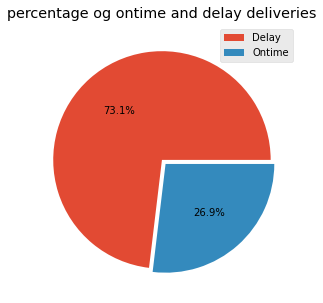

In [67]:
plt.rcParams['figure.figsize']=(5,5)
#explode = (0, 0.1, 0.2, 0.3, 0.4)
plt.pie(dfT['ontime/delay'].value_counts(), explode = (0, 0.05), autopct='%1.1f%%')
plt.title('percentage og ontime and delay deliveries')
plt.legend(['Delay', 'Ontime'])
plt.show()

In [68]:
print('star supliers with more no. of ontime delivery')
dfT[dfT['ontime/delay']==1][['supplierNameCode', 'TRANSPORTATION_DISTANCE_IN_KM']].groupby(['supplierNameCode']).agg('count').sort_values('TRANSPORTATION_DISTANCE_IN_KM', 
                                                                                                                   ascending=False).head(10).style.background_gradient(cmap='Wistia')

star supliers with more no. of ontime delivery


,TRANSPORTATION_DISTANCE_IN_KM
supplierNameCode,
SR TRANSPORTS,120
SRI PACHIAMMAN TRANSPORT,93
VJ LOGISTICS,83
A S TRANSPORTS,80
NAMAKKAL SRI ANJINAYA TRANSPORT,74
ARVINTH TRANSPORT,64
EKTA TRANSPORT COMPANY,61
KRC Logistics,47
ESWAR TRANSPORT,46


In [69]:
print('star supliers with more no. of ontime delivery')
dfT[dfT['ontime/delay']==1][['supplierNameCode', 'TRANSPORTATION_DISTANCE_IN_KM']].groupby(['supplierNameCode']).agg('sum').sort_values('TRANSPORTATION_DISTANCE_IN_KM', 
                                                                                                                   ascending=False).head(10).style.background_gradient(cmap='Wistia')

star supliers with more no. of ontime delivery


,TRANSPORTATION_DISTANCE_IN_KM
supplierNameCode,
EKTA TRANSPORT COMPANY,89964.000000
TRANS CARGO INDIA,63530.000000
KRC Logistics,57991.000000
VJ Logistics,39547.020000
Arvinth Transport,37798.000000
R.Sai logistics india PVT.LTD,31400.000000
EKTA TRAVELS,30225.000000
SR TRANSPORTS,25065.000000
Sterling Translogistics Private Limited,23240.000000


In [70]:
print('star supliers with more no. of delay delivery')
dfT[dfT['ontime/delay']==0][['supplierNameCode', 'TRANSPORTATION_DISTANCE_IN_KM']].groupby(['supplierNameCode']).agg('sum').sort_values('TRANSPORTATION_DISTANCE_IN_KM', 
                                                                                                                   ascending=False).head(10).style.background_gradient(cmap='cool')

star supliers with more no. of delay delivery


,TRANSPORTATION_DISTANCE_IN_KM
supplierNameCode,
TRANS CARGO INDIA,383841.069444
EKTA TRANSPORT COMPANY,338858.666028
Unknown,308928.018759
KRC Logistics,147349.776667
R.Sai logistics india PVT.LTD,113994.758333
Rajdhani Roadways,96608.745599
VJ Logistics,75711.153146
SUNITA CARRIERS PRIVATE LIMITED,69063.050000
PAWAN R LOGISTICS,60341.600000


In [71]:
print('star supliers with more no. of delay delivery')
dfT[dfT['ontime/delay']==0][['supplierNameCode', 'TRANSPORTATION_DISTANCE_IN_KM']].groupby(['supplierNameCode']).agg('count').sort_values('TRANSPORTATION_DISTANCE_IN_KM', 
                                                                                                                   ascending=False).head(10).style.background_gradient(cmap='cool')

star supliers with more no. of delay delivery


,TRANSPORTATION_DISTANCE_IN_KM
supplierNameCode,
SUNITA CARRIERS PRIVATE LIMITED,324
A S TRANSPORTS,316
Unknown,279
K.RAMACHANDRAN TRANSPORTS,214
EKTA TRANSPORT COMPANY,187
S.B.TRANSPORT COMPANY,183
TRANS CARGO INDIA,171
A P R TRAILLER SERVICE,156
SHRI SAI ENTERPRISES,135


In [72]:
#Let's check the supplier code for the unknown suppliers
dfT[dfT['supplierNameCode']=='Unknown']['supplierID'].value_counts()

999    316
Name: supplierID, dtype: int64

In [73]:
# Let's check whether having driver's mobile number making any impact on ontime delivery
dfT['Driver_MobileNo'].values[dfT['Driver_MobileNo'].values>0]=1
dfT['Driver_MobileNo'].fillna(0, inplace=True)
dfT[dfT['Driver_MobileNo']==1]['ontime/delay'].value_counts()

0    2003
1     677
Name: ontime/delay, dtype: int64

In [75]:
dfT[dfT['Driver_MobileNo']==0]['ontime/delay'].value_counts()

0    2321
1     914
Name: ontime/delay, dtype: int64

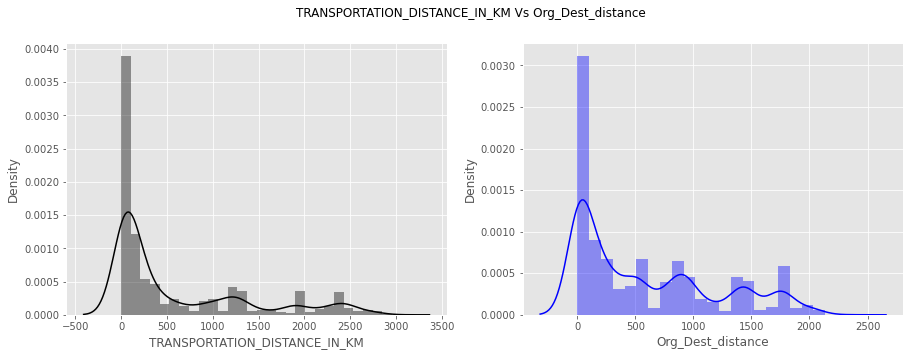

In [76]:
#let's check the pattern of 'transportation in km' vs 'distance between origin and destination'
plt.rcParams['figure.figsize']=15,5
plt.subplot(121)
sns.distplot(dfT['TRANSPORTATION_DISTANCE_IN_KM'], color='black')

plt.subplot(122)
sns.distplot(dfT['Org_Dest_distance'], color='blue')

plt.suptitle('TRANSPORTATION_DISTANCE_IN_KM Vs Org_Dest_distance')
plt.show()

In [77]:
#fraudulant entries by suppliers
dfT[dfT['Org_Dest_distance']==0][['TRANSPORTATION_DISTANCE_IN_KM', 'supplierNameCode']].groupby(['supplierNameCode']).agg('sum').sort_values('TRANSPORTATION_DISTANCE_IN_KM', 
                                                                                                                   ascending=False).head(10).style.background_gradient(cmap='plasma')

,TRANSPORTATION_DISTANCE_IN_KM
supplierNameCode,
ARVINTH TRANSPORT,16450.000000
ESWAR TRANSPORT,15381.000000
Sree Sakthi Transport,10054.271429
VJ LOGISTICS,9379.000000
KASAM TRANSPORT SERVICE,7740.000000
SUSEE TRANSPORTER,4661.000000
SR TRANSPORTS,3540.000000
VIRS TEMPO SERVICE,2340.000000
S R LOGISTICS,2340.000000


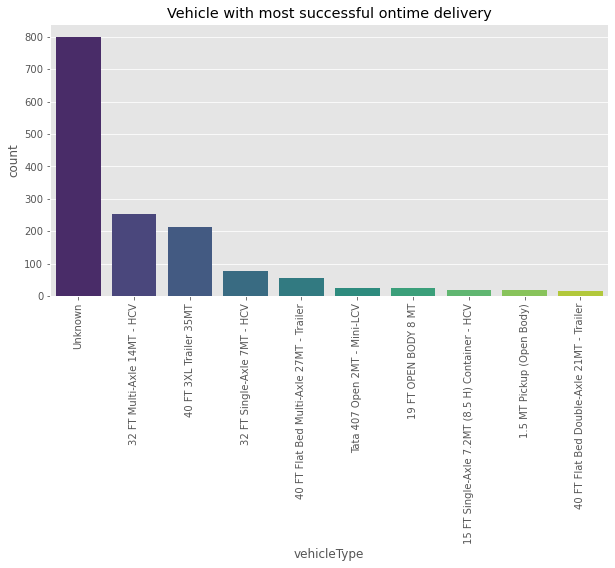

In [78]:
plt.rcParams['figure.figsize']=10,5
sns.countplot(dfT[dfT['ontime/delay']==1]['vehicleType'],
             order=dfT[dfT['ontime/delay']==1]['vehicleType'].value_counts().head(10).index,
             palette='viridis')
plt.xticks(rotation=90)
plt.title('Vehicle with most successful ontime delivery')
plt.show()

By this result, we can see that we don't have vehicletype data for most of the record. Definetly we shoud have record of vehicle type to get the suppliers having star vehicle. By this we can see the second most successful star vehicle which making more number of ontime delivery is '32 FT Multi-Axle 14MT - HCV'

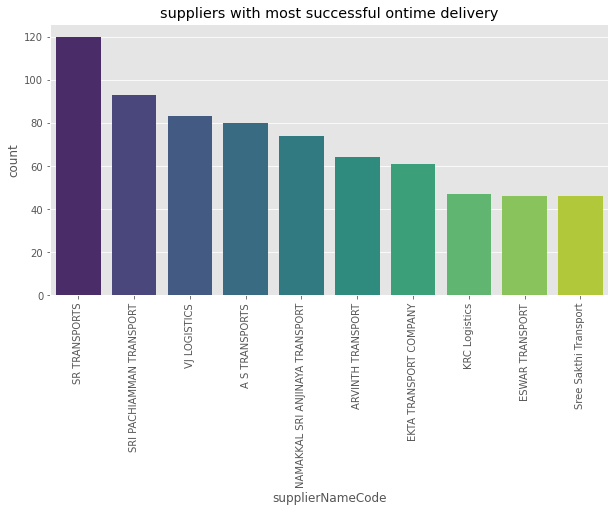

In [79]:
plt.rcParams['figure.figsize']=10,5
sns.countplot(dfT[dfT['ontime/delay']==1]['supplierNameCode'],
             order=dfT[dfT['ontime/delay']==1]['supplierNameCode'].value_counts().head(10).index,
             palette='viridis')
plt.xticks(rotation=90)
plt.title('suppliers with most successful ontime delivery')
plt.show()

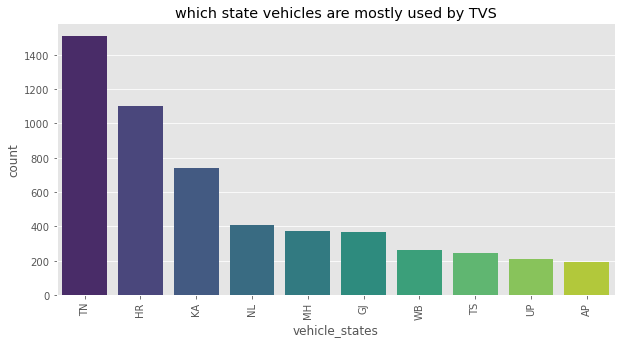

In [80]:
plt.rcParams['figure.figsize']=10,5
sns.countplot(dfT['vehicle_states'],
             order=dfT['vehicle_states'].value_counts().head(10).index,
             palette='viridis')
plt.xticks(rotation=90)
plt.title('which state vehicles are mostly used by TVS')
plt.show()

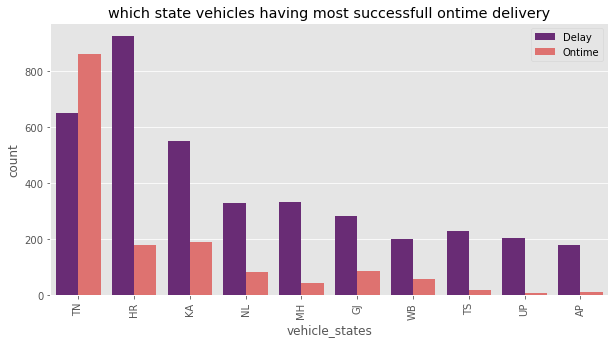

In [81]:
plt.rcParams['figure.figsize']=10,5
sns.countplot(dfT['vehicle_states'],
             order=dfT['vehicle_states'].value_counts().head(10).index,
              hue=dfT['ontime/delay'],
             palette='magma')
plt.xticks(rotation=90)
plt.title('which state vehicles having most successfull ontime delivery')
plt.legend(['Delay', 'Ontime'])
plt.show()

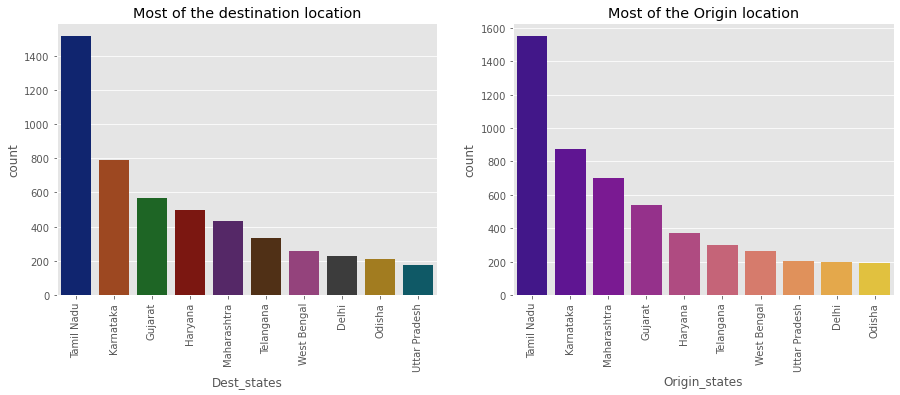

In [82]:
plt.rcParams['figure.figsize']=15,5

plt.subplot(121)
sns.countplot(dfT['Dest_states'],
             order=dfT['Dest_states'].value_counts().head(10).index,
             palette='dark')
plt.xticks(rotation=90)
plt.title('Most of the destination location')

plt.subplot(122)
sns.countplot(dfT['Origin_states'],
             order=dfT['Origin_states'].value_counts().head(10).index,
             palette='plasma')
plt.xticks(rotation=90)
plt.title('Most of the Origin location')

plt.show()

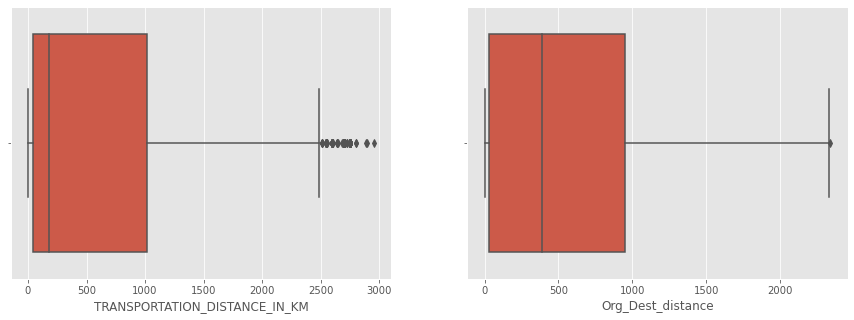

In [83]:
plt.subplot(121)
sns.boxplot(dfT['TRANSPORTATION_DISTANCE_IN_KM'])

plt.subplot(122)
sns.boxplot(dfT['Org_Dest_distance'])
plt.show()

we don't have major outliers in our data

##### Feature Encoding

In [84]:
#let's filter usefull data alone
df_cln=dfT[['Market/Regular ',
       'vehicle_no',
       'Current_Location',
       'TRANSPORTATION_DISTANCE_IN_KM',
       'vehicleType', 'Driver_Name',
       'Driver_MobileNo', 'customerID', 'supplierID',
       'Material Shipped', 'ontime/delay',
       'vehicle_states', 'Origin_states', 'Dest_states', 'Org_Dest_distance']]

In [90]:
#let's make a copy of filtered data
df_copy=df_cln.copy()

In [91]:
#df_cln['GpsProvider']=df_cln.GpsProvider.astype("category").cat.codes
#df_cln['BookingID']=df_cln.BookingID.astype("category").cat.codes
df_cln['vehicle_no']=df_cln.vehicle_no.astype("category").cat.codes
df_cln['customerID']=df_cln.customerID.astype("category").cat.codes
df_cln['supplierID']=df_cln.supplierID.astype("category").cat.codes
#df_cln['Origin_Location']=df_cln.Origin_Location.astype("category").cat.codes
#df_cln['Destination_Location']=df_cln.Destination_Location.astype("category").cat.codes
df_cln['Current_Location']=df_cln.Current_Location.astype("category").cat.codes
df_cln['vehicleType']=df_cln.vehicleType.astype("category").cat.codes
#df_cln['customerNameCode']=df_cln.customerNameCode.astype("category").cat.codes
#df_cln['supplierNameCode']=df_cln.supplierNameCode.astype("category").cat.codes
df_cln['Material Shipped']=df_cln['Material Shipped'].astype("category").cat.codes
df_cln['Market/Regular ']=df_cln['Market/Regular '].astype("category").cat.codes
df_cln['Driver_Name']=df_cln['Driver_Name'].astype("category").cat.codes
df_cln['vehicle_states']=df_cln.vehicle_states.astype("category").cat.codes
df_cln['Origin_states']=df_cln['Origin_states'].astype("category").cat.codes
df_cln['Dest_states']=df_cln['Dest_states'].astype("category").cat.codes

In [92]:
corr_matrix=df_cln.corr()
corr_matrix["ontime/delay"].sort_values(ascending=False)

ontime/delay                     1.00
supplierID                       0.50
vehicleType                      0.21
vehicle_states                   0.20
vehicle_no                       0.20
Dest_states                      0.18
Origin_states                    0.11
Current_Location                 0.08
Material Shipped                 0.01
Driver_MobileNo                 -0.03
TRANSPORTATION_DISTANCE_IN_KM   -0.08
Market/Regular                  -0.13
Org_Dest_distance               -0.23
Driver_Name                     -0.24
customerID                      -0.26
Name: ontime/delay, dtype: float64

In [93]:
x=df_cln.drop('ontime/delay', axis=1)
y=df_cln['ontime/delay'].values

#### Scaling Treatment

In [94]:
from sklearn.preprocessing import StandardScaler

#to_scale=df_cln.select_dtypes(include='number').columns.tolist()[1:-1]
sc=StandardScaler()
scaled=sc.fit_transform(x)
x_scl=pd.DataFrame(scaled, columns=x.columns)

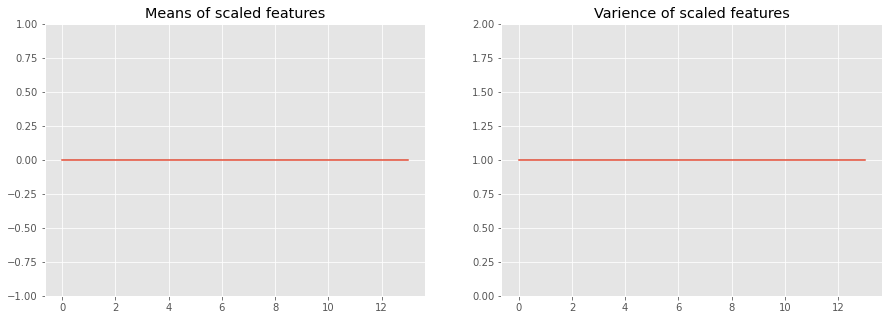

In [95]:
#check weathear data is standardized or not
plt.subplot(121)
plt.ylim(-1,1)

means=[]
for i in range(x_scl.shape[1]):
    means.append(np.mean(x_scl.iloc[:,i]))
plt.plot(means, scaley=False)
plt.title('Means of scaled features')

plt.subplot(122)
plt.ylim(0,2)
vars=[]
for i in range(x_scl.shape[1]):
    vars.append(np.var(x_scl.iloc[:,i]))
plt.plot(vars, scaley=False)
plt.title('Varience of scaled features')
plt.show()

dataset is well standardised

#### Model Building

Logistic Refression¶

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scl, y, test_size=0.25)

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, roc_auc_score

In [98]:
LR=LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [99]:
LR.score(X_test, y_test)

0.8417849898580122

In [100]:
y_pred_LR=LR.predict(X_test)

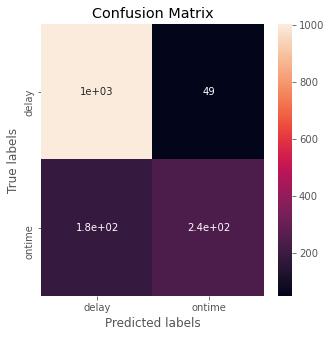

In [101]:
plt.rcParams['figure.figsize']=5,5
ax= plt.subplot()
cm = confusion_matrix(y_test, y_pred_LR)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['delay', 'ontime']); ax.yaxis.set_ticklabels(['delay', 'ontime']);

In [102]:
fpr, tpr, thres = roc_curve(y_test, LR.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

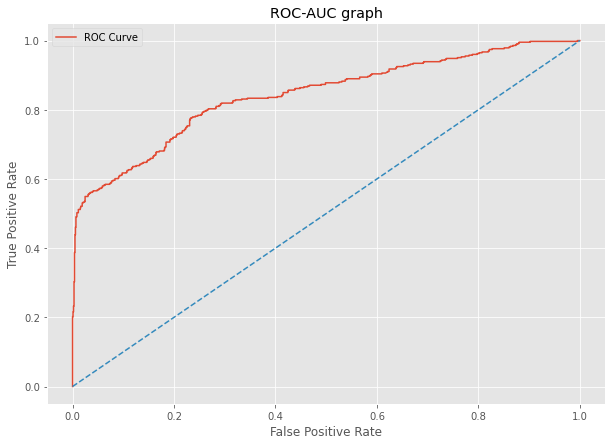

In [103]:
plt.rcParams['figure.figsize']=10,7
plt.plot(fpr, tpr, label = 'ROC Curve' %roc_auc)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC-AUC graph')
plt.show()

In [104]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.feature_selection import SelectFromModel

In [105]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [106]:
RF =RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

In [107]:
RF.score(X_test, y_test)

0.8843813387423936

In [108]:
y_pred_RF=RF.predict(X_test)

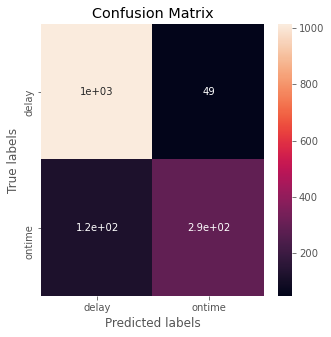

In [109]:
plt.rcParams['figure.figsize']=5,5
ax= plt.subplot()
cm = confusion_matrix(y_test, y_pred_RF)
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['delay', 'ontime']); ax.yaxis.set_ticklabels(['delay', 'ontime']);

In [110]:
fpr, tpr, thres = roc_curve(y_test, RF.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

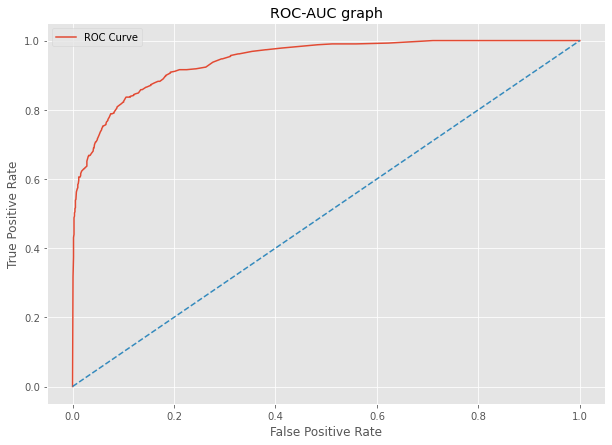

In [111]:
plt.rcParams['figure.figsize']=10,7
plt.plot(fpr, tpr, label = 'ROC Curve' %roc_auc)
plt.plot([0, 1], [0, 1], '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC-AUC graph')
plt.show()

Selecting most helping Parametes

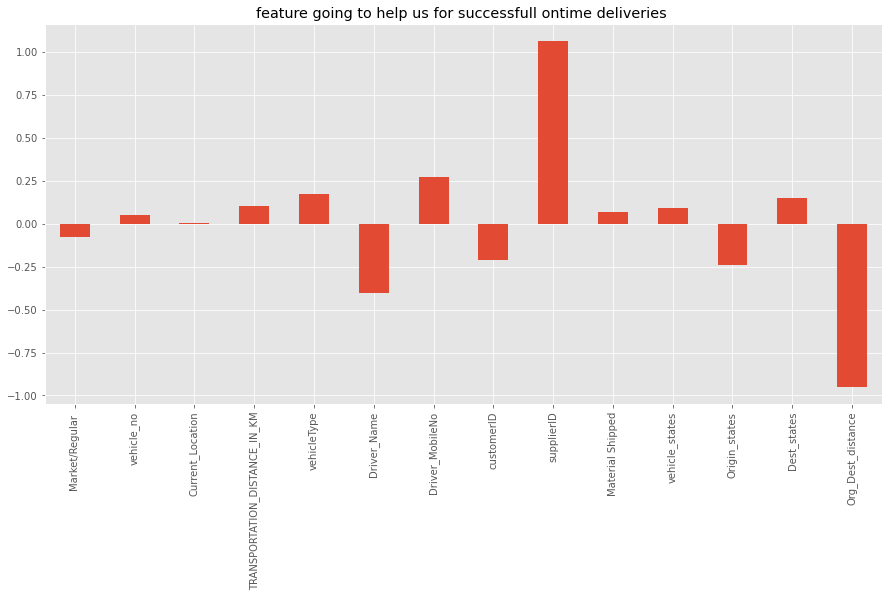

In [112]:
plt.rcParams['figure.figsize']=15,7
plt.style.use('ggplot')
weights=pd.Series(LR.coef_[0], index=['Market/Regular ', 'vehicle_no', 'Current_Location',
       'TRANSPORTATION_DISTANCE_IN_KM', 'vehicleType', 'Driver_Name',
       'Driver_MobileNo', 'customerID', 'supplierID', 'Material Shipped',
       'vehicle_states', 'Origin_states', 'Dest_states', 'Org_Dest_distance'])

params_weight =weights.plot(kind='bar', title='feature going to help us for successfull ontime deliveries ')
fig=params_weight.get_figure()
plt.show()

#### Parameters that impact on ontime delivery
-Current location

-Transportation distance

-Vehicle state

-Vehicle type

-Driver mobile number

-Supplier

-material shipped

-Destination state